# REINFORCE Number test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import os
import sys
import warnings

import torch
import torch.optim as optim

ROOT_FOLDER = os.path.join(".", "..")
if ROOT_FOLDER not in sys.path:
    sys.path.insert(0, ROOT_FOLDER)


from dataset import RegexDataset
from environment_metrics import Environment, EnvSettings
from plot import plot_rewards
from reinforce import PGN, evaluate, train_eval_loop
from rl import PolicyAgent as Agent
from rl import PolicyTrajectoryBuffer as TrajectoryBuffer
from utils import set_seed

warnings.filterwarnings("ignore")
logging.disable(logging.WARNING)
torch.backends.cudnn.deterministic = True
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

## Training

In [4]:
set_seed()
dataset = RegexDataset(*RegexDataset.from_disk("../../data/single_number.json"))
env = Environment(
    dataset,
    settings=EnvSettings(max_steps=5),
)

agent = Agent(temperature_coefficient=0)
buffer = TrajectoryBuffer(batch_size=64, device=DEVICE)

pgn = PGN(input_dim=env.state_space, output_dim=env.action_space).to(DEVICE)
pgn_optimizer = optim.Adam(pgn.parameters(), lr=1e-4)

In [ ]:
episode_rewards = train_eval_loop(
    pgn,
    pgn_optimizer,
    agent,
    buffer,
    env,
    epochs=100,
    episodes=1000,
    device=DEVICE,
    eval_period=20,
    entropy_beta=0.01,
    clip_grad=10,
)

Epoch   1/100:	Reward: -193.2	Loss: -13.465
Epoch   2/100:	Reward: -193.5	Loss: -13.137
Epoch   3/100:	Reward: -193.4	Loss: -13.270
Epoch   4/100:	Reward: -193.7	Loss: -12.829
Epoch   5/100:	Reward: -192.9	Loss: -13.791
Epoch   6/100:	Reward: -193.5	Loss: -13.126
Epoch   7/100:	Reward: -193.7	Loss: -12.837
Epoch   8/100:	Reward: -193.4	Loss: -13.177
Epoch   9/100:	Reward: -193.6	Loss: -12.984
Epoch  10/100:	Reward: -194.0	Loss: -12.443
Epoch  11/100:	Reward: -193.3	Loss: -13.296
Epoch  12/100:	Reward: -193.1	Loss: -13.573
Epoch  13/100:	Reward: -193.2	Loss: -13.474
Epoch  14/100:	Reward: -193.0	Loss: -13.708
Epoch  15/100:	Reward: -193.1	Loss: -13.618
Epoch  16/100:	Reward: -193.6	Loss: -12.947
Epoch  17/100:	Reward: -193.0	Loss: -13.785
Epoch  18/100:	Reward: -193.3	Loss: -13.362
Epoch  19/100:	Reward: -193.5	Loss: -13.118
Epoch  20/100:	Reward: -192.8	Loss: -14.016
Epoch  21/100:	Reward: -193.0	Loss: -13.703
Epoch  22/100:	Reward: -193.9	Loss: -12.528
Epoch  23/100:	Reward: -192.1	Lo

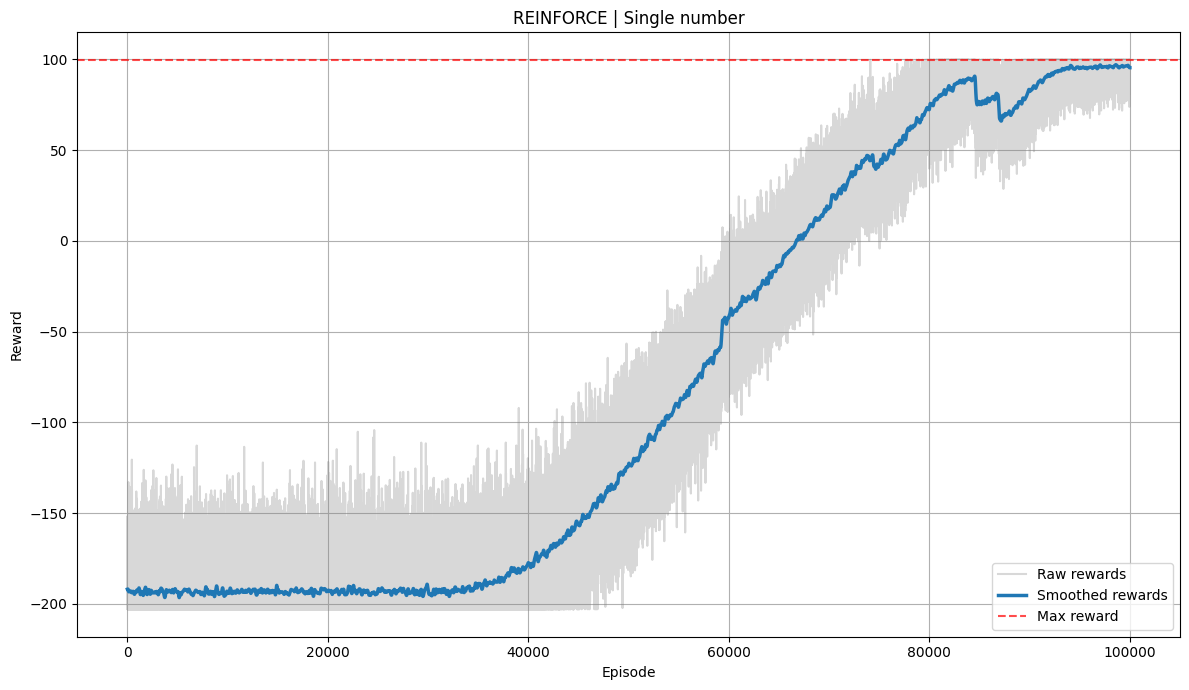

In [11]:
plot_rewards(episode_rewards, title="REINFORCE | Single number", window=50)

## Results

In [ ]:
set_seed()
trained_regex, trained_reward = evaluate(pgn, env, agent, device=DEVICE)
print(f"Regex: {trained_regex}")
print(f"Total Reward: {trained_reward}")

Regex: \d+
Total Reward: 49899.99994499999


In [13]:
set_seed()
random_regex, random_reward = evaluate(pgn, env, agent, random=True, device=DEVICE)
print(f"Regex: {random_regex}")
print(f"Total Reward: {random_reward}")

Regex: \^vlhI
Total Reward: -65936.23015890368
